In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd

from future import GenericFuture
from curve import CommodityCurve

In [4]:
filename = "../data/MultipleTestData.xlsx"

co_tickers = {"Brent": "ICE_B", "WTI": "CME_CL", "Wheat": "CME_W",
              "Corn": "CME_C", "Copper": "CME_HG", "Lead": "MCX_PB",
              "Aluminium": "CME_ALI", "Gas": "CME_NG", "Hogs": "CME_LN",
              "Coffee": "ICE_KC", "Cotton": "ICE_CT", "Cocoa": "ICE_CC",
              "Sugar": "ICE_SB", "HeatOil": "CME_HO", "Gasoline": "CME_RB",
              "Lumber": "CME_LB", "NaturalGas": "CME_NG", "Gold": "CME_GC",
              "Platinum": "CME_PL", "AUD": "CME_AD", "ZAR": "CME_RA", "NOK": "CME_NJ",
              "CAD": "CME_CD", "UST5": "CME_FV", "UST2": "CME_TU", "UST10": "CME_TY",
              "FedFunds": "CME_FF"}

In [5]:
data = pd.read_excel(filename, index_col="Date")
data.head()

,CME_CL1,CME_CL10,CME_CL11,CME_CL12,CME_CL13,CME_CL14,CME_CL15,CME_CL16,CME_CL17,CME_CL18,...,CME_CL35,CME_CL36,CME_CL37,CME_CL38,CME_CL4,CME_CL5,CME_CL6,CME_CL7,CME_CL8,CME_CL9
Date,,,,,,,,,,,,,,,,,,,,,
1959-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
tickers = data.columns
futures = [GenericFuture(ticker=t, number=int(t.split("_CL")[1]), data=data[t]) for t in tickers]
curve = CommodityCurve(num_instruments=len(futures))

for f in futures:
    curve.add_future(f, f.contract_number())

curve.create_curve()


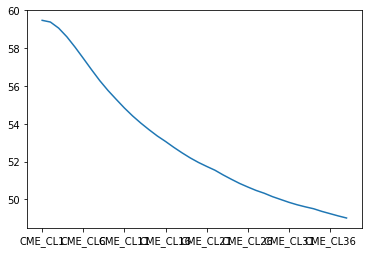

In [10]:
curve.plot_latest()
plt.show()

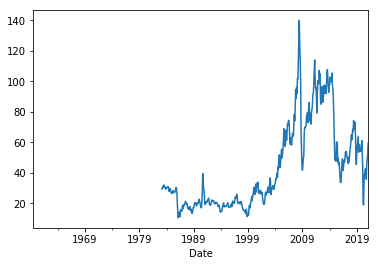

In [16]:
tickers = data.columns[1:]
fdata = data.iloc[:, 0]
ticker = tickers[1]
number = 1

future = GenericFuture(ticker=ticker, number=number)
future.fill_data(data=fdata)
future.to_monthly()
future.plot()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f967fab15c0>,
      dtype=object)

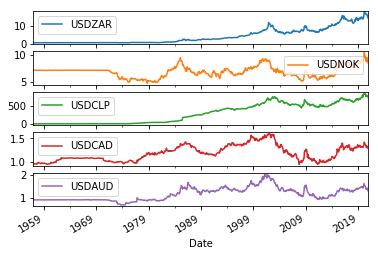

In [12]:
fx_filename = "../data/FXData.xlsx"
fxdata = pd.read_excel(fx_filename)
fxdata = fxdata.rename(columns={"period":"Date"})
fxdata["Date"] = pd.to_datetime(fxdata["Date"]) + MonthEnd(1)
fxdata = fxdata.set_index("Date", drop=True)
fxdata.head()
fxdata.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda14d19b70>,
      dtype=object)

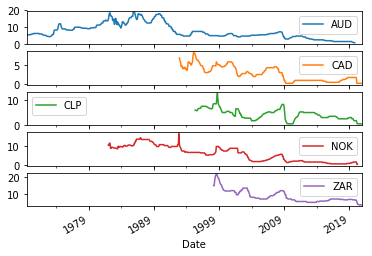

In [32]:
ir_filename = "../data/InterestRates.xlsx"
irdata = pd.read_excel(ir_filename)
irdata = irdata.rename(columns={"period":"Date"})
irdata["Date"] = pd.to_datetime(irdata["Date"]) + MonthEnd(1)
irdata = irdata.set_index("Date", drop=True)
irdata.head()
irdata.plot(subplots=True)